## criando e ativando um ambiente virtual 
python -m venv primeiro_AMBIENTE 

primeiro_AMBIENTE\Scripts\activate (o ambiente virtual fica gravado no prompt) 

   
## instalando e verificando os pacotes no ambiente virtual 
pip install xgboost pandas numpy 

pip install sklearn 

pip list 
  

## desativando o ambiente virtual 
deactivate 

  
## reutilizando o ambiente virtual 
primeiro_AMBIENTE\Scripts\activate 

  
## removendo o ambiente virtual 
rmdir /s /q primeiro_AMBIENTE 

 
## para usar o ambiente virtual no Jupyter Notebook:    
pip install ipykernel 

pip install notebook 

python -m ipykernel install --user --name=primeiro_AMBIENTE --display-name "Python (primeiro_AMBIENTE)" 

In [1]:
# importação do XGBoost, biblioteca de machine learning convergente para regressão multi-output
import xgboost as xgb

In [2]:
# importação dos pacotes para calculos matemáticos e para manipulação de dados tabulares
import pandas as pd
import numpy as np

# carregando os dados
dados = pd.read_csv('measures_v2.csv')

In [3]:
# o conjunto de dados registra 185 horas medições de sensores de um motor elétrico (síncrono de imã permanente) instalado 
# em uma bancada de testes, onde cada sessão é identificada pela coluna "profile_id". 
# Disponível em: https://www.kaggle.com/datasets/wkirgsn/electric-motor-temperature 
display(dados)

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,1.871008e-01,17
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,2.454175e-01,17
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,1.766153e-01,17
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,2.383027e-01,17
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,2.081967e-01,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330811,-2.152128,30.721298,45.274497,0.791801,41.934347,0.000380,-2.000169,1.097528,62.147780,38.653720,23.989078,-8.116730e-60,71
1330812,-2.258684,30.721306,45.239017,0.778900,41.868923,0.002985,-2.000499,1.097569,62.142646,38.656328,23.970700,-5.815891e-60,71
1330813,-2.130312,30.721312,45.211576,0.804914,41.804819,0.002301,-1.999268,1.098765,62.138387,38.650923,23.977234,-4.167268e-60,71
1330814,-2.268498,30.721316,45.193508,0.763091,41.762220,0.005662,-2.000999,1.095696,62.133422,38.655686,24.001421,-2.985978e-60,71


In [4]:
# Definição dos dados de entrada e saída
features = dados.drop(['pm', 'stator_yoke', 'stator_tooth', 'stator_winding'], axis=1)
targets = dados[['pm', 'stator_yoke', 'stator_tooth', 'stator_winding']]

In [5]:
# Constatação da inexistência de dados missing no dataframe
dados.isnull().sum()

u_q               0
coolant           0
stator_winding    0
u_d               0
stator_tooth      0
motor_speed       0
i_d               0
i_q               0
pm                0
stator_yoke       0
ambient           0
torque            0
profile_id        0
dtype: int64

In [6]:
# divisão dos dados em conjunto de treino (80%) e de teste (20%)
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(features, targets, test_size=0.2, random_state=42)

In [7]:
# treinamento do modelo usando uma classe do XGBoost, que irá detectar automaticamente que se trata de uma
# regressão multi-output e treinará um modelo para cada saída.
from xgboost import XGBRegressor

# Definir e treinar o modelo
modelo = XGBRegressor(tree_method='hist')
modelo.fit(X_treino, y_treino)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [8]:
# fazendo as previsões
y_pred = modelo.predict(X_teste)

In [9]:
# leitura do array, a partir da esquerda - targets = 'pm', 'stator_yoke', 'stator_tooth' e 'stator_winding'
display(y_pred)

array([[ 89.035965,  77.229126,  89.62094 , 105.841095],
       [ 75.94178 ,  63.67216 ,  83.97011 , 108.54201 ],
       [ 66.25771 ,  43.22961 ,  47.030975,  61.005688],
       ...,
       [ 60.131283,  73.18391 ,  78.33584 ,  83.00743 ],
       [ 46.128456,  36.59385 ,  37.85357 ,  38.595142],
       [ 43.849583,  31.690422,  36.05599 ,  36.403614]], dtype=float32)

In [10]:
# avaliação do desempenho, usando as métricas de Erro Médio Absoluto (MAE) e Raiz do Erro Quadrático Médio (RMSE)

from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_teste, y_pred)
print(f"Erro Médio Absoluto: {mae}")
rmse = mean_squared_error(y_teste, y_pred, squared=False)
print(f"Raiz do Erro Quadrático Médio: {rmse}")

Erro Médio Absoluto: 2.907579936025522
Raiz do Erro Quadrático Médio: 4.534772154822743


C:\Users\fabio.araujo\Desktop\DSA_fundamentos_PY - Copia\1-Cap17\segundo_AMBIENTE\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## outra abordagem

In [11]:
# importação para treinar o XGBoost com o MultiOutPutRegressor do Scikit-learn

from sklearn.multioutput import MultiOutputRegressor

# criando uma classe do XGBRegressor
xgb_regressor_class = XGBRegressor(tree_method='hist')

# passando o xgb_regressor_class ao objeto MultiOutputRegressor
regressor_multisaida = MultiOutputRegressor(xgb_regressor_class)

# treinando o modelo
regressor_multisaida.fit(X_treino, y_treino)
                         
# modelo e regressor_multisaida                         

MultiOutputRegressor(estimator=XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))

In [12]:
y_pred_m = regressor_multisaida.predict(X_teste)

In [13]:
display(y_pred_m)

array([[ 88.70699 ,  76.960556,  89.62081 , 104.22515 ],
       [ 73.723755,  63.464035,  83.9701  , 110.56084 ],
       [ 66.54056 ,  43.62752 ,  47.030968,  60.649338],
       ...,
       [ 60.25152 ,  73.72727 ,  78.33584 ,  83.91247 ],
       [ 46.647778,  36.84949 ,  37.853573,  38.468323],
       [ 43.670105,  31.440916,  36.055984,  36.295147]], dtype=float32)

In [14]:
# avaliação do desempenho, usando as métricas de Erro Médio Absoluto (MAE) e Raiz do Erro Quadrático Médio (RMSE)

from sklearn.metrics import mean_absolute_error, mean_squared_error
mae_m = mean_absolute_error(y_teste, y_pred_m)
print(f"Erro Médio Absoluto: {mae_m}")
rmse_m = mean_squared_error(y_teste, y_pred_m, squared=False)
print(f"Raiz do Erro Quadrático Médio: {rmse_m}")

Erro Médio Absoluto: 2.9096059071068505
Raiz do Erro Quadrático Médio: 4.546300684630438


C:\Users\fabio.araujo\Desktop\DSA_fundamentos_PY - Copia\1-Cap17\segundo_AMBIENTE\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [15]:
mae, mae_m, rmse, rmse_m

(np.float64(2.907579936025522),
 np.float64(2.9096059071068505),
 np.float64(4.534772154822743),
 np.float64(4.546300684630438))

## plotando as métricas dos modelos estudados

In [16]:
!pip install matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

Erro Médio Absoluto: 2.907579936025522
Raiz do Erro Quadrático Médio: 4.534772154822743
Erro Médio Absoluto: 2.9096059071068505
Raiz do Erro Quadrático Médio: 4.546300684630438


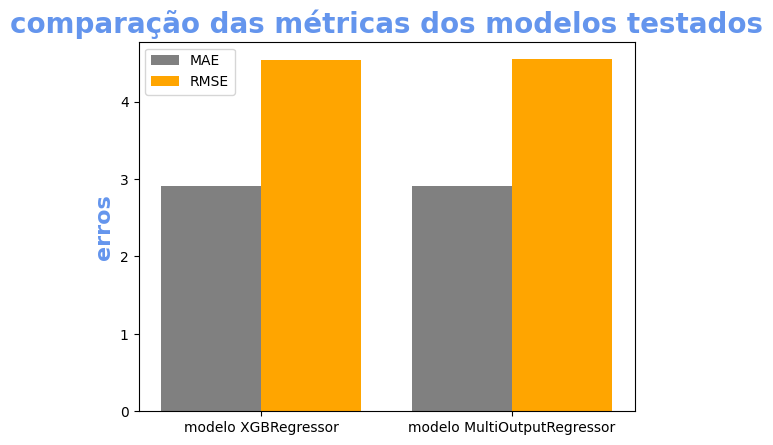

In [17]:
# Supondo que y_teste e y_pred já estejam definidos
print(f"Erro Médio Absoluto: {mae}")
print(f"Raiz do Erro Quadrático Médio: {rmse}")

# Para o segundo conjunto de previsões (y_pred_m)
print(f"Erro Médio Absoluto: {mae_m}")
print(f"Raiz do Erro Quadrático Médio: {rmse_m}")

# Preparando os dados para plotagem
labels = ['modelo XGBRegressor', 'modelo MultiOutputRegressor']
mae_values = [mae, mae_m]
rmse_values = [rmse, rmse_m]

# Criando o gráfico
x = range(len(labels))

plt.bar(x, mae_values, width=0.4, label='MAE', color='gray', align='center')
plt.bar([p + 0.4 for p in x], rmse_values, width=0.4, label='RMSE', color='orange', align='center')

# Adicionando detalhes ao gráfico
plt.xlabel('')
plt.ylabel('erros', size=16, color ='CornflowerBlue', fontweight='bold')
plt.title('comparação das métricas dos modelos testados', color = 'CornflowerBlue', size=20, fontweight ='bold')
plt.xticks([p + 0.2 for p in x], labels)
plt.legend()

# incluindo labels e finalizando o gráfico

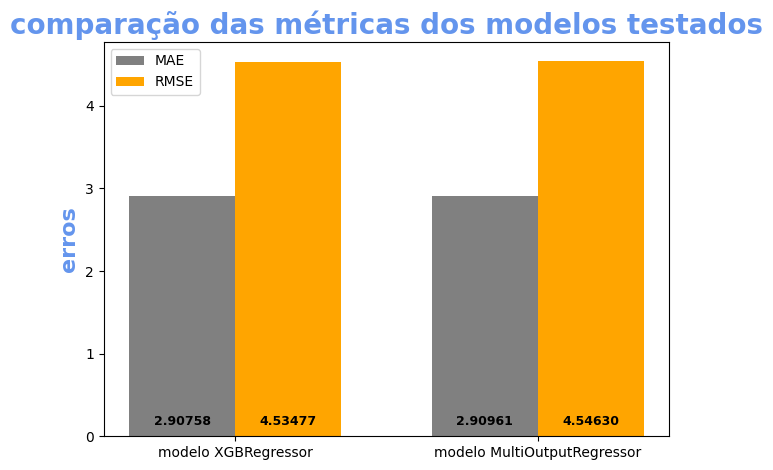

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# ... (seu código para calcular mae, rmse, mae_m e rmse_m)

# preparação dos dados para plotagem
labels = ['modelo XGBRegressor', 'modelo MultiOutputRegressor']
mae_values = [mae, mae_m]
rmse_values = [rmse, rmse_m]

# criação do gráfico de colunas
x = np.arange(len(labels))  # Usando np.arange para melhor controle das posições
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, mae_values, width, label='MAE', color='gray', align='center')
rects2 = ax.bar(x + width/2, rmse_values, width, label='RMSE', color='orange', align='center')

# Adicionando detalhes ao gráfico
ax.set_ylabel('erros', size=16, color ='CornflowerBlue', fontweight='bold')
ax.set_title('comparação das métricas dos modelos testados', color = 'CornflowerBlue', size=20, fontweight ='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Função para adicionar rótulos nas colunas com 5 casas decimais, na base interna

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.5f}'.format(height),  # Formatação com 5 casas decimais
                    xy=(rect.get_x() + rect.get_width() / 2, 0),  # Coordenadas para a base interna
                    xytext=(0, 15),  # Ajuste vertical para centralizar na base
                    textcoords="offset points",
                    ha='center', va='top',  # Alinhamento vertical para centralizar na base
                    fontsize=9, fontweight='bold') # Ajuste tamanho da fonte se necessário

# Adicionando rótulos às barras
autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()